<a href="https://colab.research.google.com/github/aslack100/Data-Portfolio/blob/main/Analyzing_Feature_Importance_of_Subscription_Services.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from google.colab import files

## **Data Preparation**

In [ ]:
# Uploading the file and reading it into a DataFrame
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
# uploaded file is an Excel file, read it into a DataFrame
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)  # Use pd.read_csv() for csv files

In [ ]:
# Display dataset information
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Handle missing values (if any)
df = df.dropna()

In [ ]:
# Convert 'TotalCharges' to numeric (it might have non-numeric values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()

In [ ]:
# Encode categorical variables using LabelEncoder
encoder = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    if column != 'customerID':  # Exclude unique ID column
        df[column] = encoder.fit_transform(df[column])

In [ ]:
# Feature-target split
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

### **EDA**

In [ ]:
# Generate summary statistics for numerical features
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Create a summary statistics table
summary_statistics = numerical_df.describe().transpose()

# Add more detailed statistics (if needed)
summary_statistics['range'] = summary_statistics['max'] - summary_statistics['min']

# Display the summary statistics
print("Summary Statistics:")
print(summary_statistics)

# Save the table to visualize in a DataFrame
summary_statistics.reset_index(inplace=True)
summary_statistics.rename(columns={'index': 'Feature'}, inplace=True)

Summary Statistics:
                   count         mean          std    min       25%       50%  \
gender            7032.0     0.504693     0.500014   0.00    0.0000     1.000   
SeniorCitizen     7032.0     0.162400     0.368844   0.00    0.0000     0.000   
Partner           7032.0     0.482509     0.499729   0.00    0.0000     0.000   
Dependents        7032.0     0.298493     0.457629   0.00    0.0000     0.000   
tenure            7032.0    32.421786    24.545260   1.00    9.0000    29.000   
PhoneService      7032.0     0.903299     0.295571   0.00    1.0000     1.000   
MultipleLines     7032.0     0.940557     0.948627   0.00    0.0000     1.000   
InternetService   7032.0     0.872582     0.737271   0.00    0.0000     1.000   
OnlineSecurity    7032.0     0.789249     0.859962   0.00    0.0000     1.000   
OnlineBackup      7032.0     0.905859     0.880394   0.00    0.0000     1.000   
DeviceProtection  7032.0     0.903868     0.880178   0.00    0.0000     1.000   
TechSupp

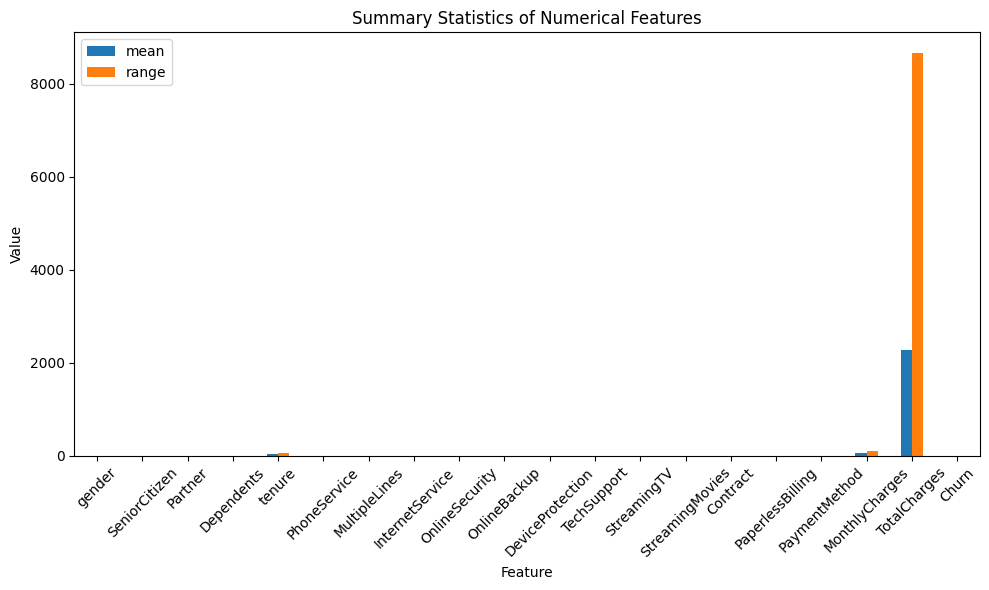

In [ ]:
# Plot mean and range for numerical features
summary_statistics.set_index('Feature')[['mean', 'range']].plot(kind='bar', figsize=(10, 6))
plt.title('Summary Statistics of Numerical Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

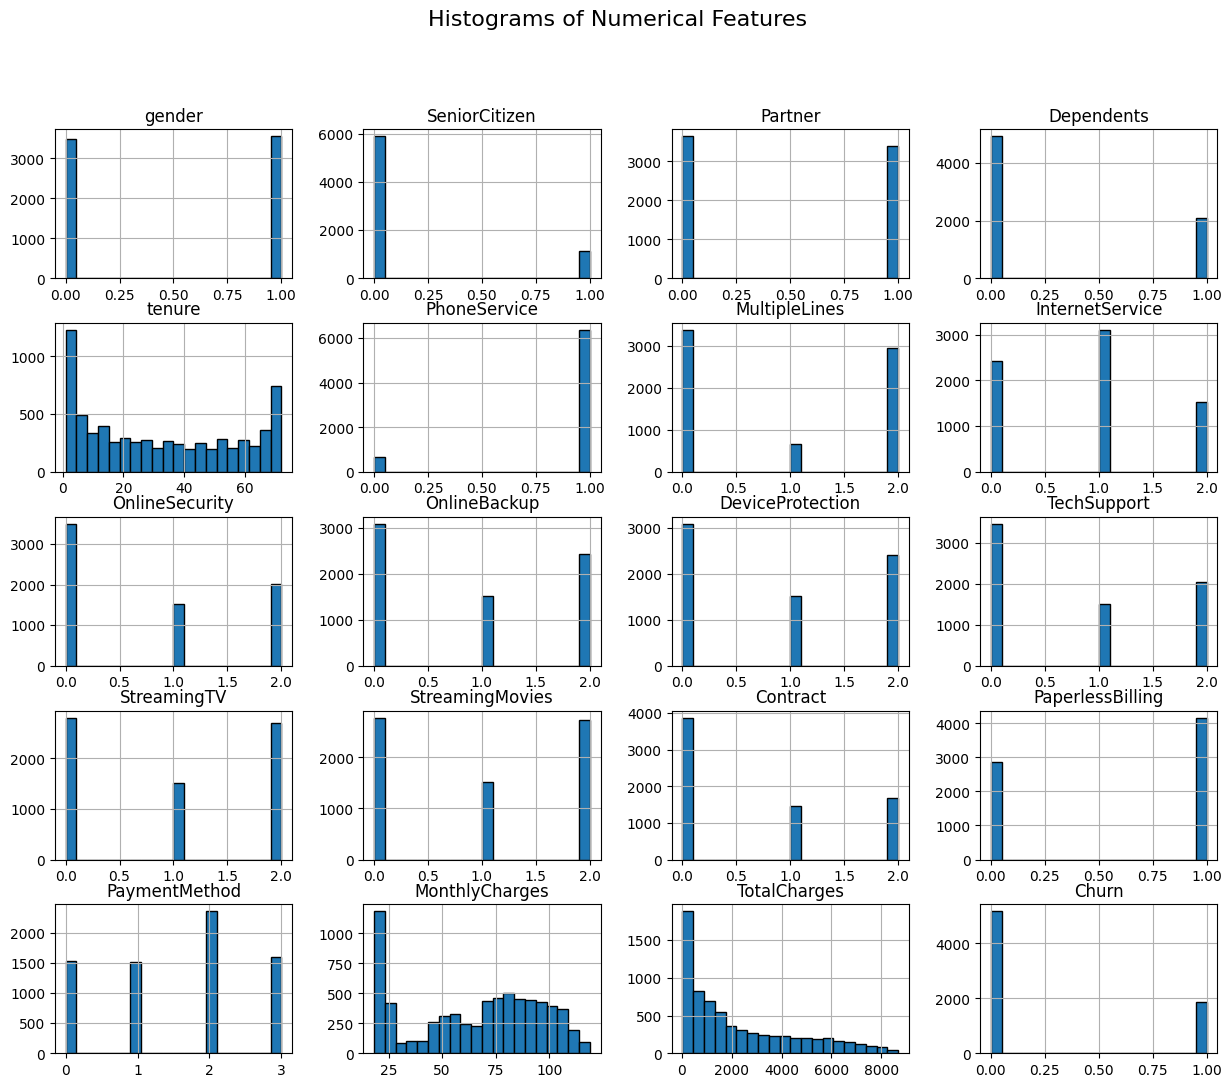

In [ ]:
# Plot histograms for each feature
df.hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

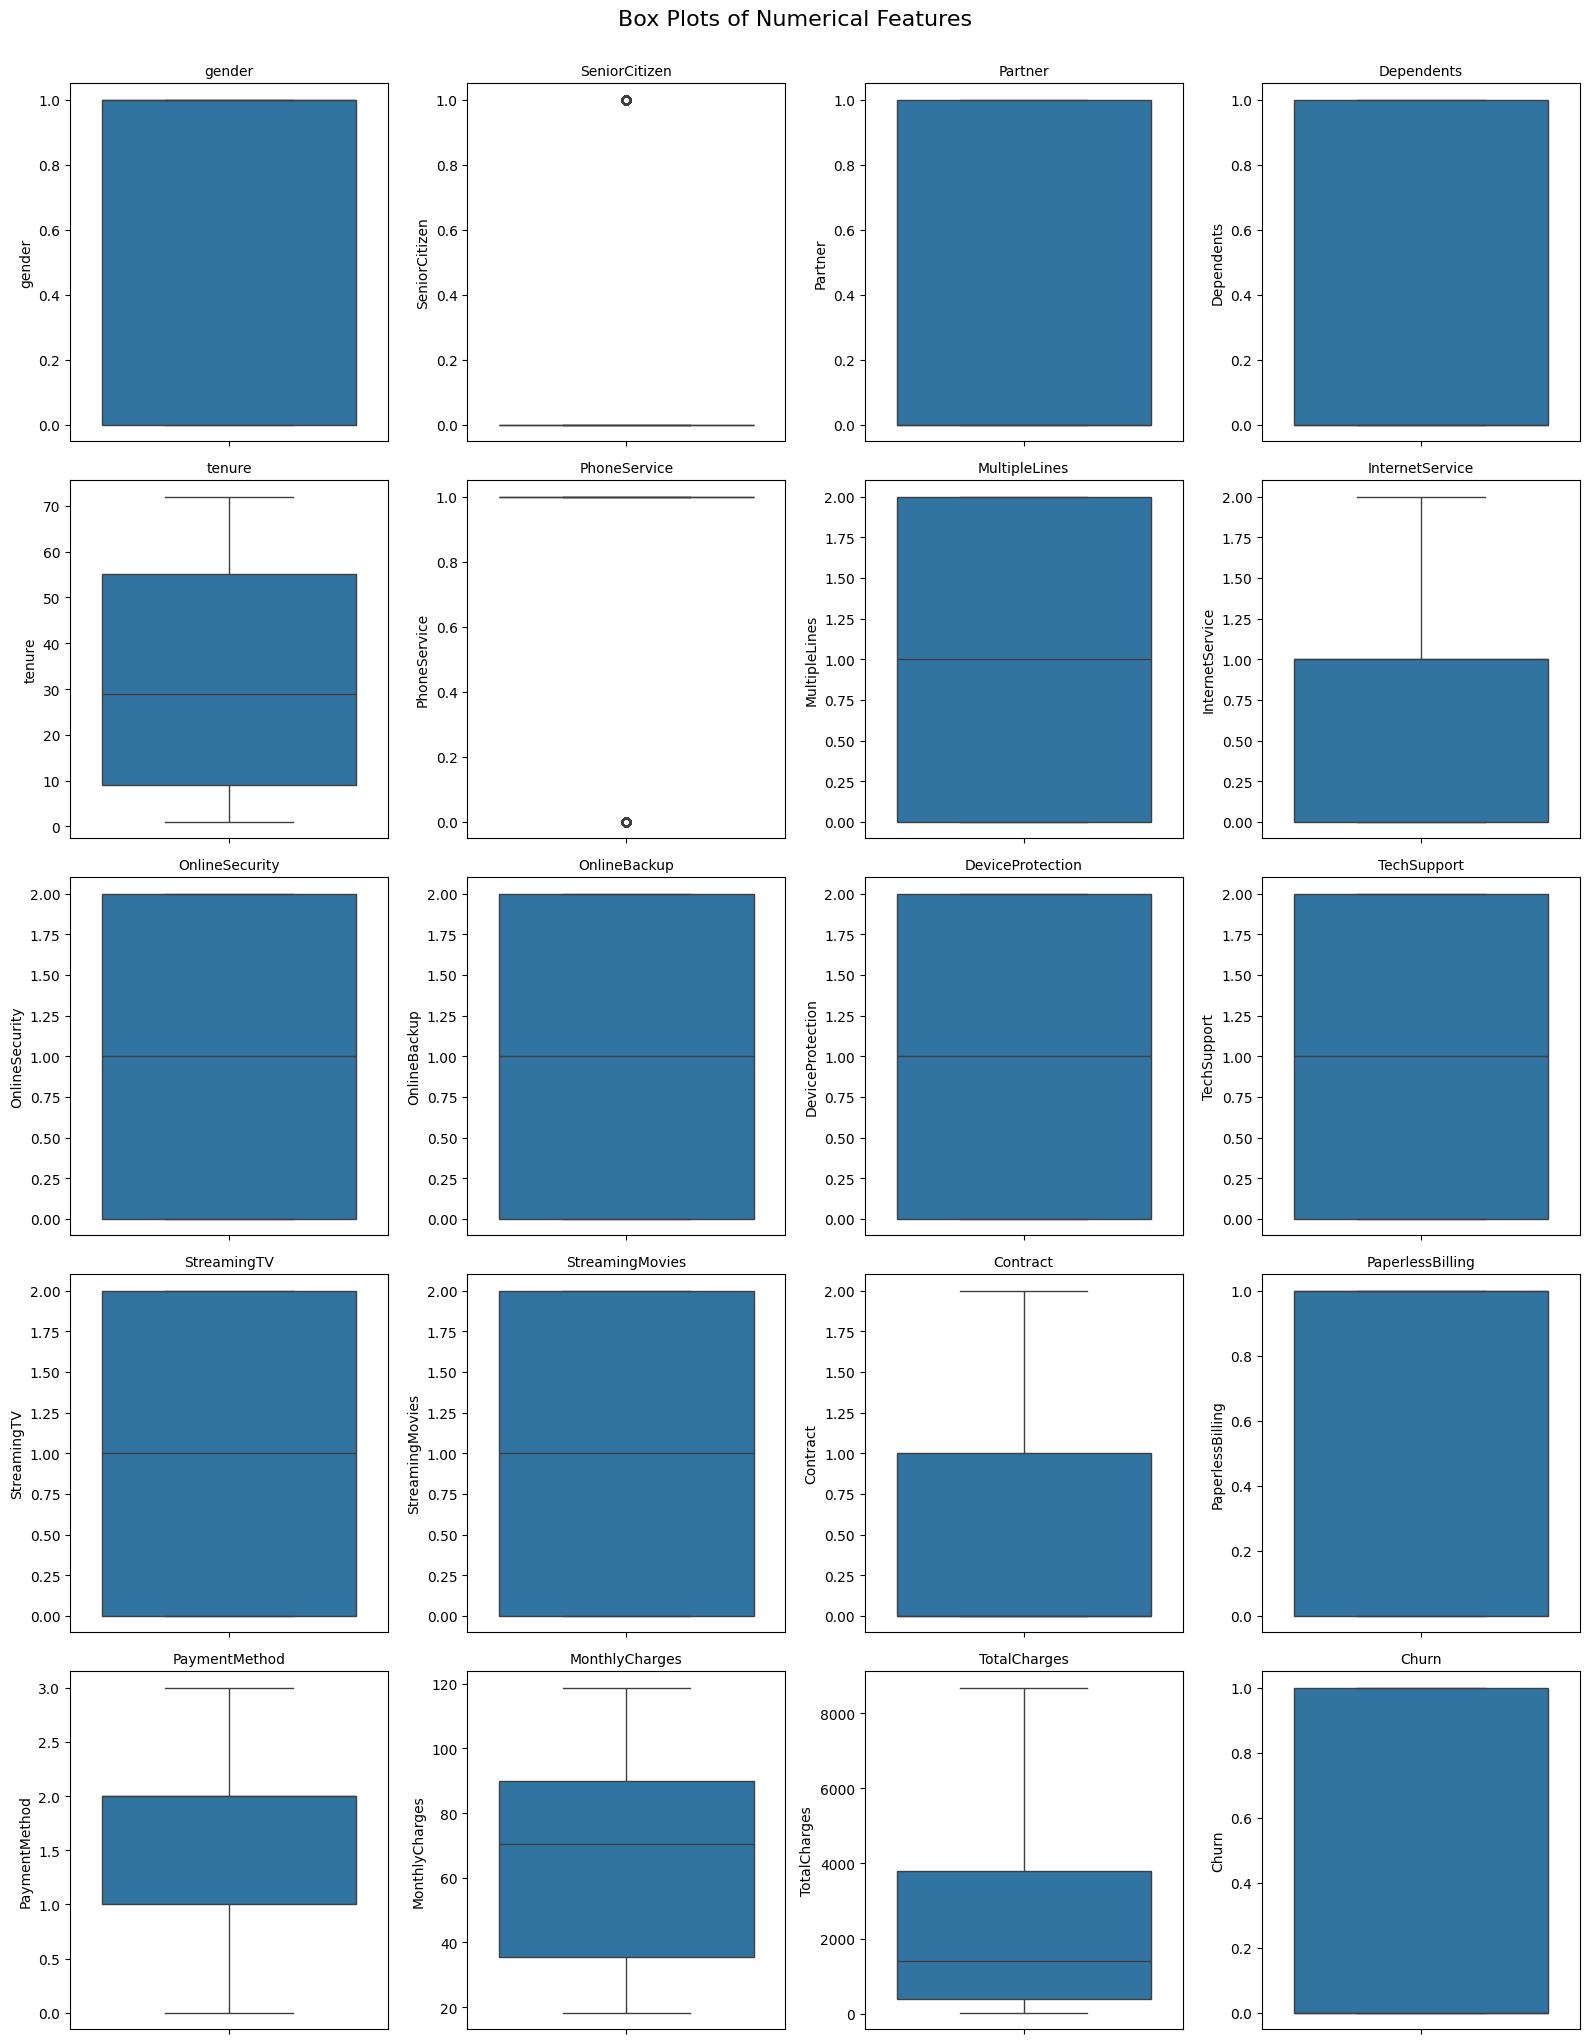

In [ ]:
# Plot box plots for numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
num_features = len(numerical_features)

# Calculate the number of rows and columns needed
num_rows = (num_features // 4) + (num_features % 4 > 0)  # Adjust based on number of features
plt.figure(figsize=(16, num_rows * 4))

for i, column in enumerate(numerical_features, 1):
    plt.subplot(num_rows, 4, i)  # Adjust the grid dynamically
    sns.boxplot(y=df[column])
    plt.title(column, fontsize=10)
    plt.tight_layout()

plt.suptitle('Box Plots of Numerical Features', y=1.02, fontsize=16)
plt.show()

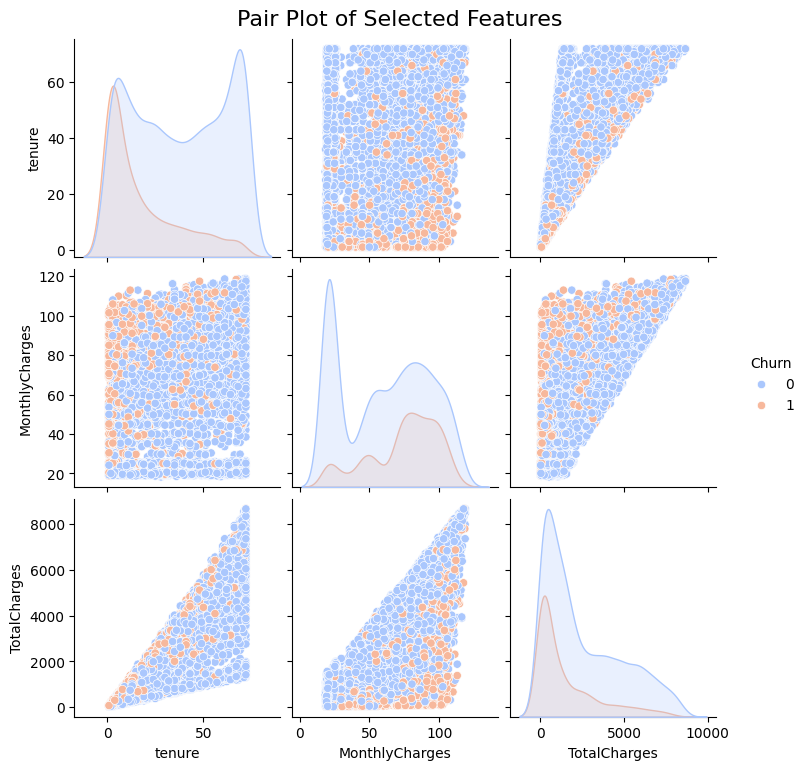

In [ ]:
# Pair plot to explore relationships
sns.pairplot(df, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pair Plot of Selected Features', y=1.02, fontsize=16)
plt.show()

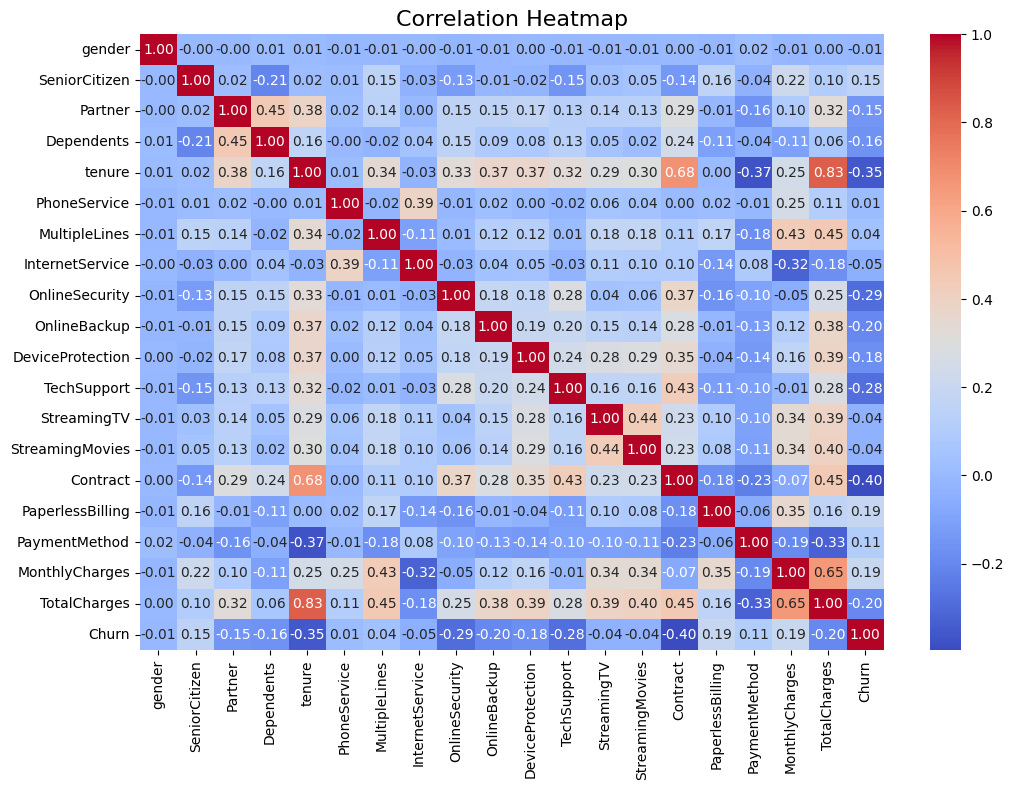

In [ ]:
# Select only numerical features for correlation
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

<ipython-input-16-a62cc87b523a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


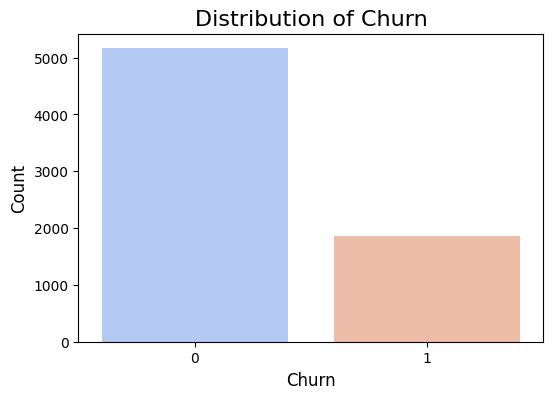

In [ ]:
# Churn proportion
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Distribution of Churn', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

### **Model Training and Evaluation**

Import Libraries:

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay

In [ ]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("Dataset loaded successfully.")


Dataset loaded successfully.


In [ ]:
#Step 2: Data preprocessing
# Drop irrelevant columns like customerID
if 'customerID' in data.columns:
    data = data.drop(columns=['customerID'])

In [ ]:
# Convert 'TotalCharges' to numeric (handle non-numeric entries)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna()  # Drop rows with missing values after conversion

In [ ]:
# Encode categorical variables
encoder = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = encoder.fit_transform(data[col])


In [ ]:
# Check the processed data
print("Processed Data:\n", data.head())

Processed Data:
    gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1

In [ ]:
# Step 3: Split the data into features and target
X = data.drop(columns=['Churn'])  # Features
y = data['Churn']  # Target variable


In [ ]:
# Ensure the target variable is binary
print("Unique values in target (y):", y.unique())

Unique values in target (y): [0 1]


In [ ]:
# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Step 4: Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("Model trained successfully.")


Model trained successfully.


In [ ]:
# Step 5: Evaluate the model
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [ ]:
# AUC score
proba = model.predict_proba(X_test)
print("AUC Score:", roc_auc_score(y_test, proba[:, 1]))


AUC Score: 0.8113316698676303


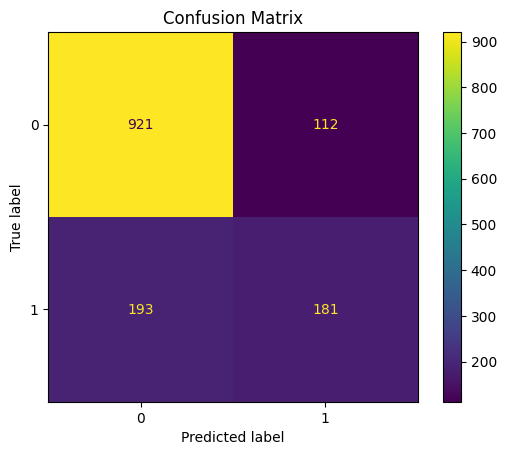

In [ ]:
# Confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Step 6: Feature Importance
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

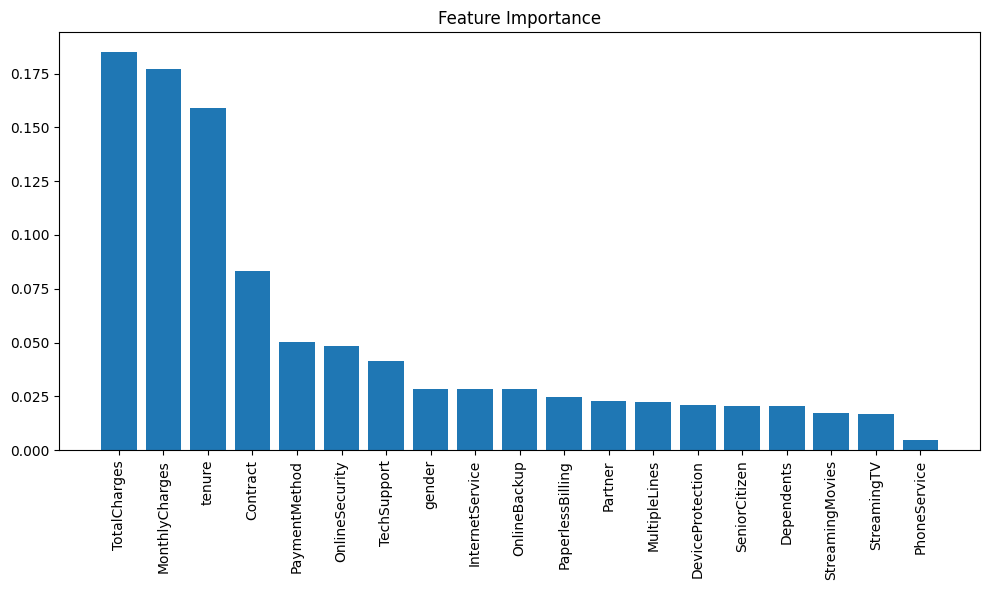

In [ ]:

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


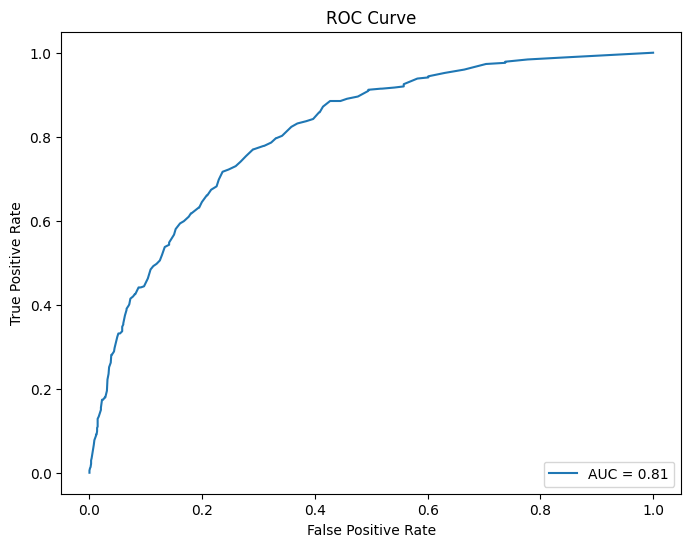

In [ ]:
fpr, tpr, _ = roc_curve(y_test, proba[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, proba[:, 1]):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
proba = model.predict_proba(X_test)
threshold = 0.3  # Adjust threshold
y_pred_custom = (proba[:, 1] >= threshold).astype(int)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Train with the best parameters
model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
model.fit(X_train, y_train)


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='recall')
print("Cross-Validation Recall Scores:", scores)
print("Average Recall:", scores.mean())


Cross-Validation Recall Scores: [0.47860963 0.52673797 0.49597855 0.50802139 0.52406417]
Average Recall: 0.5066823414718068


In [ ]:
data['TotalRevenue'] = data['tenure'] * data['MonthlyCharges']


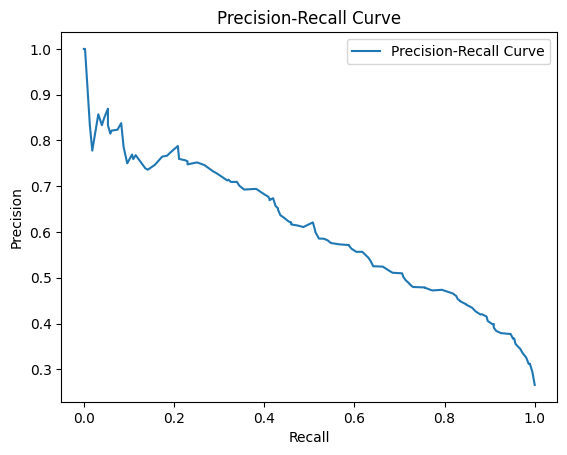

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, proba[:, 1])

plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


# Generating Insights


In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.8053335992259796

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=20, n_estimators=50,
                       n_jobs=-1, random_state=42)

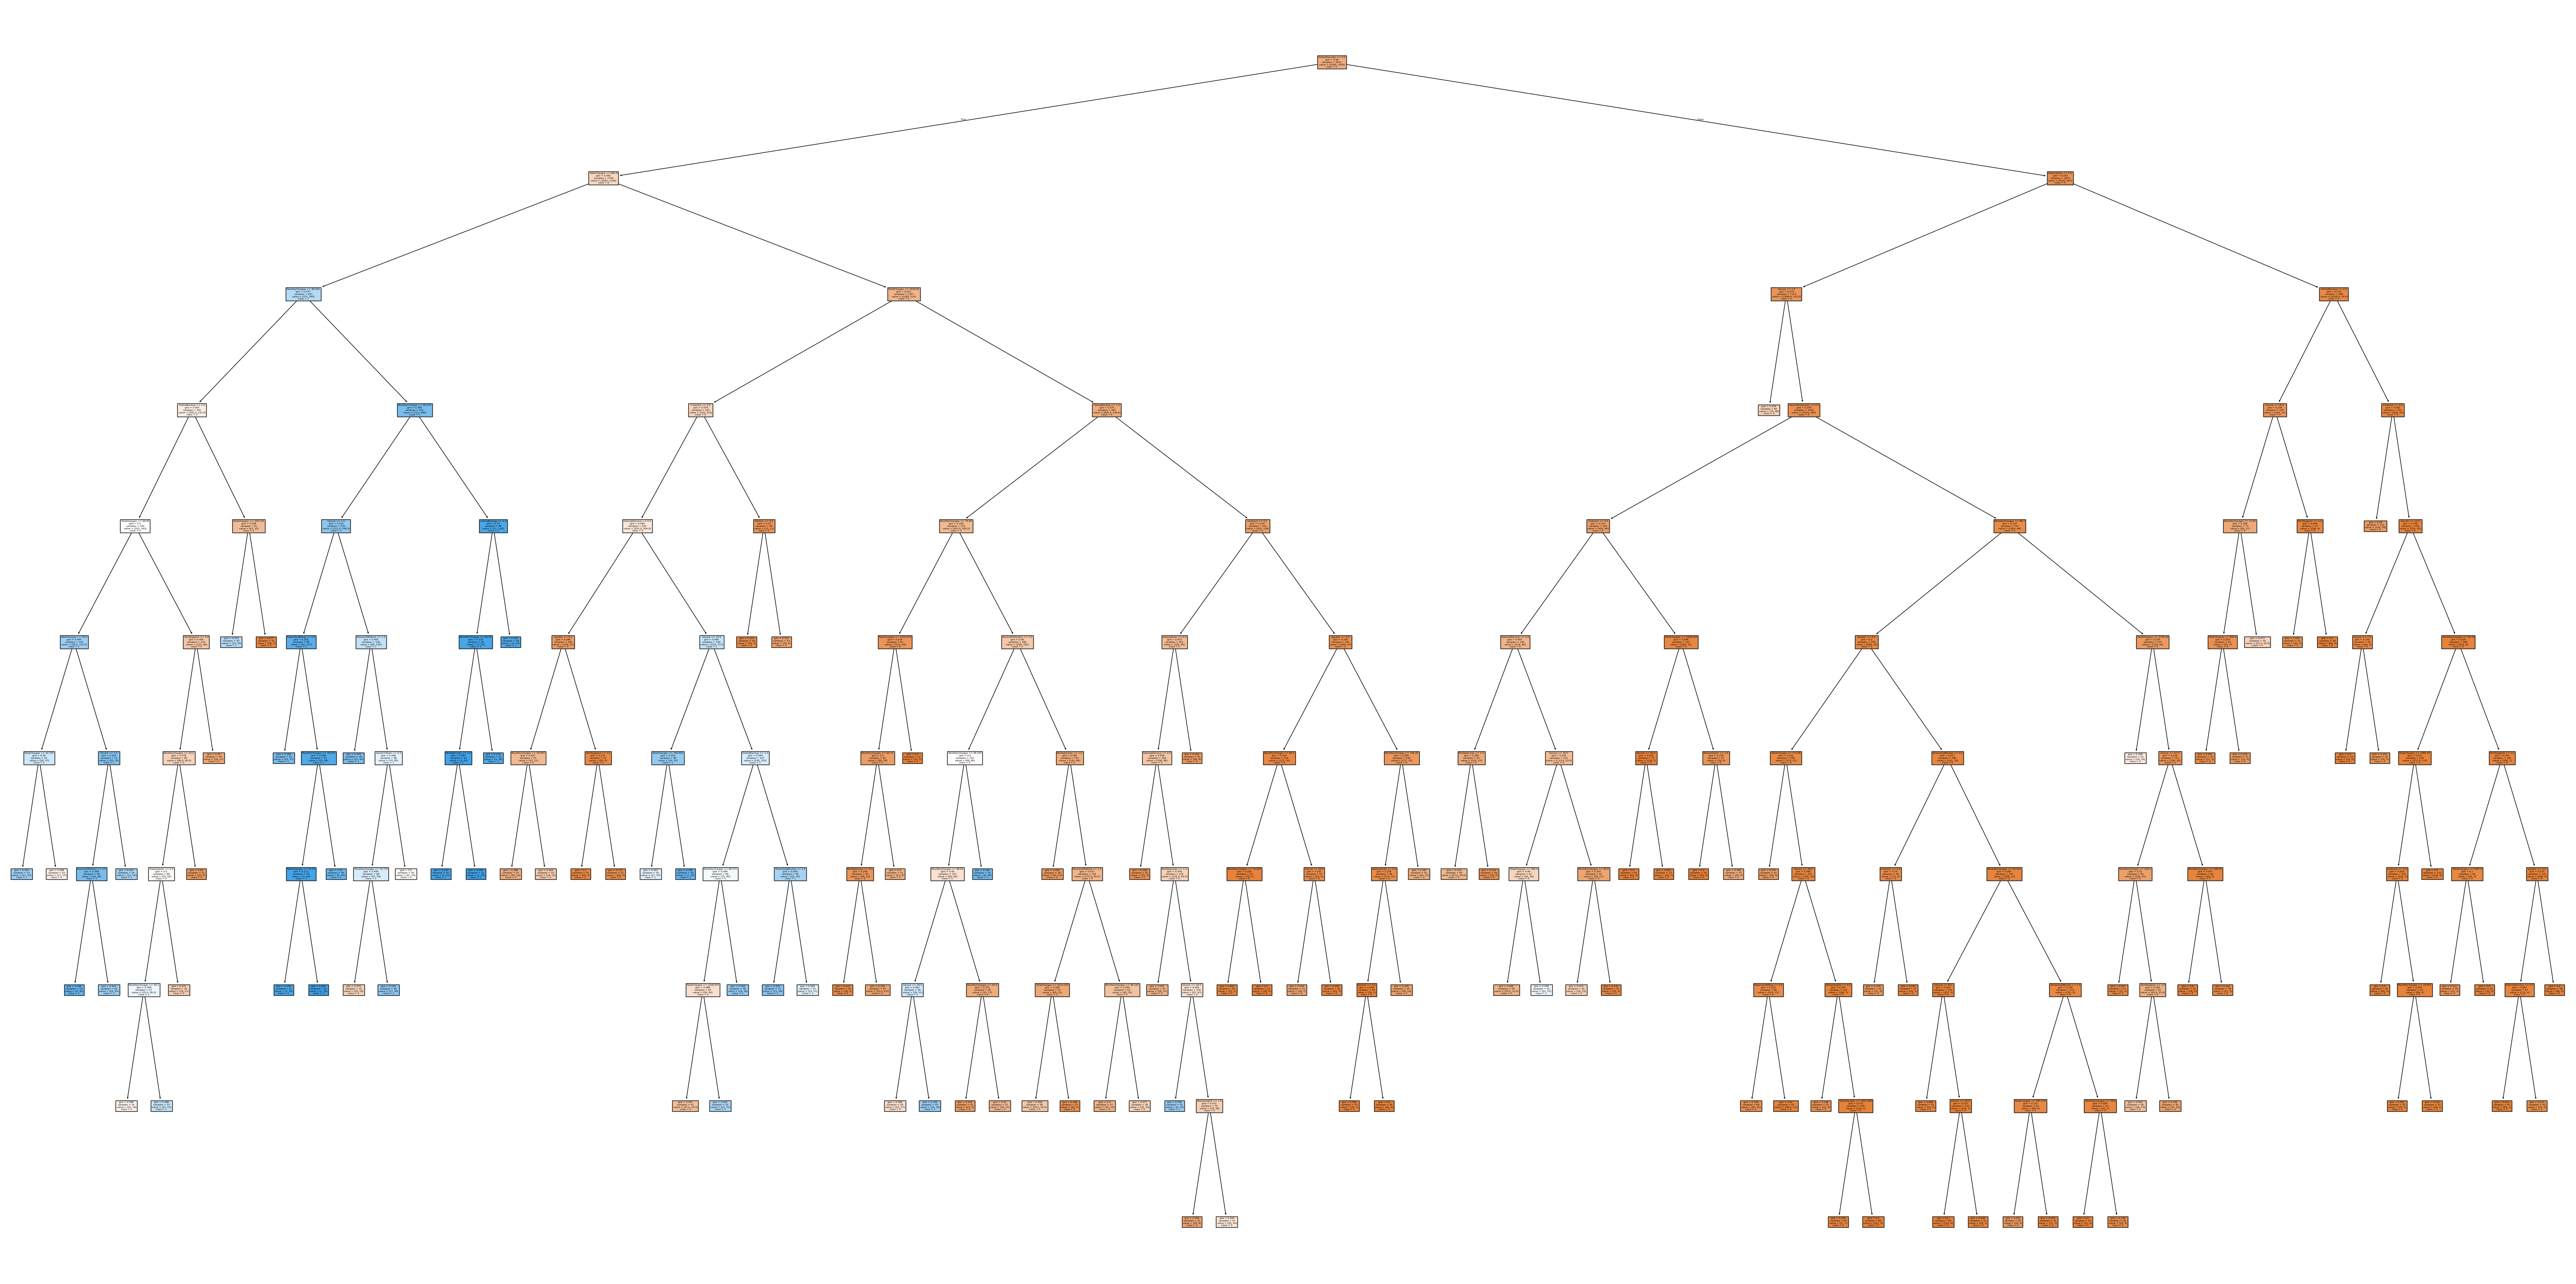

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['0', "1"],filled=True);

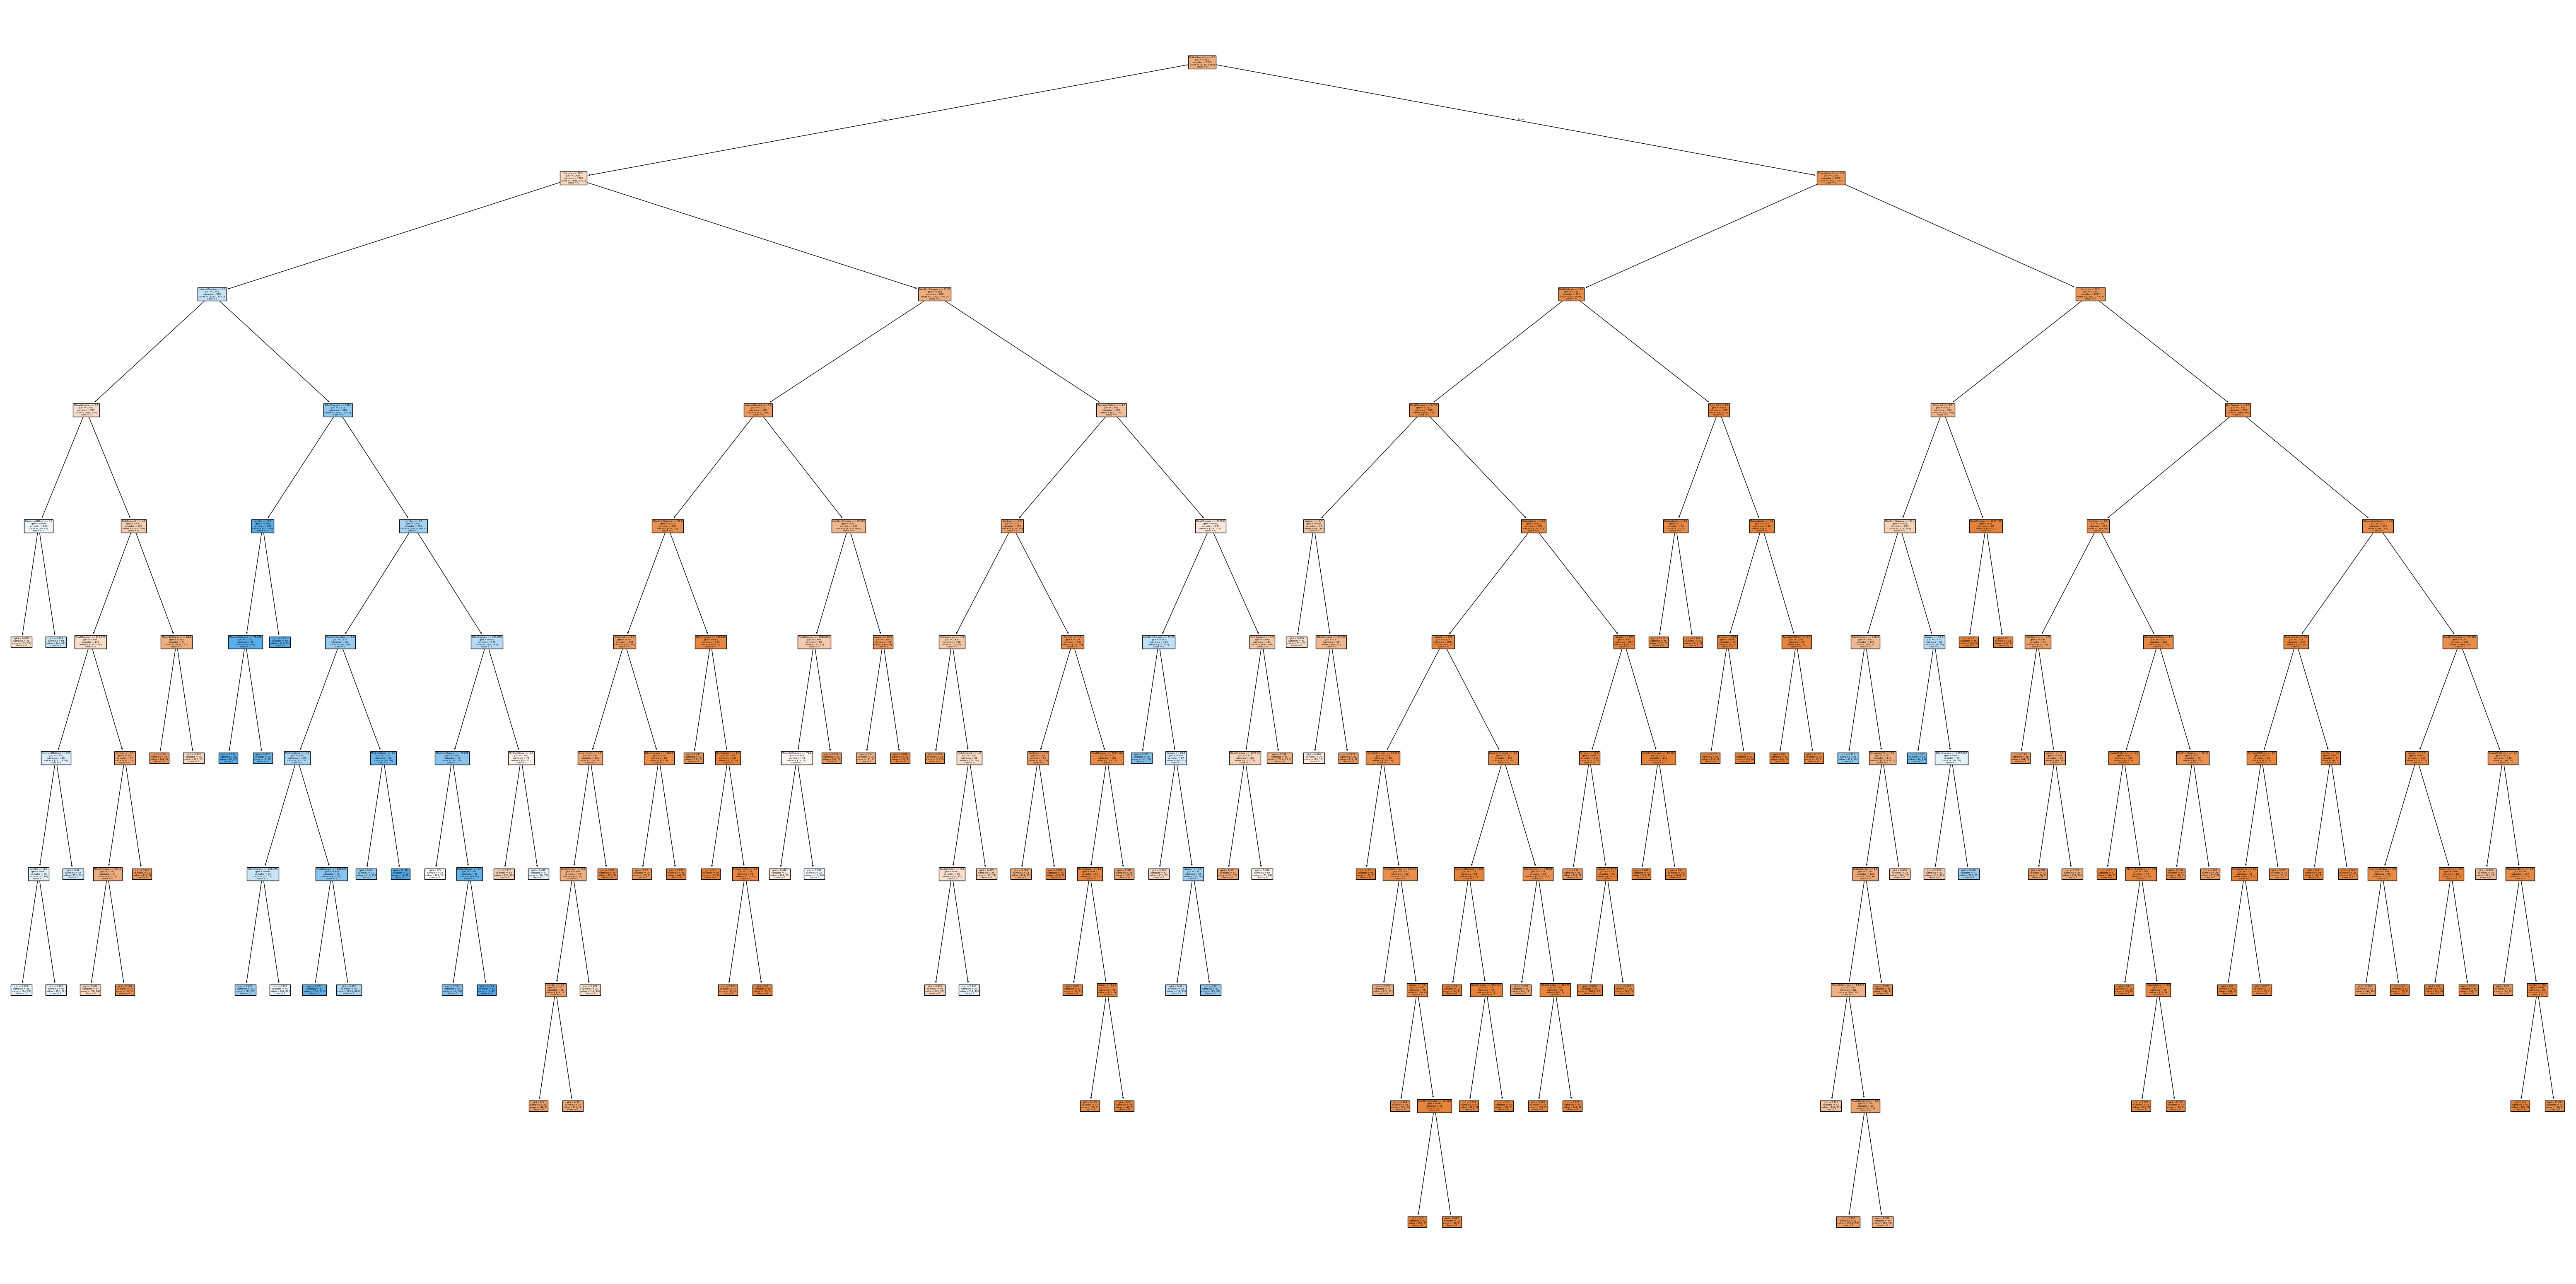

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['0', "1"],filled=True);

In [ ]:
rf_best.feature_importances_

array([0.00688261, 0.00896574, 0.00722058, 0.00914981, 0.17110973,
       0.00217254, 0.01418852, 0.06047506, 0.11276942, 0.03055839,
       0.01641814, 0.0866525 , 0.0113031 , 0.00922773, 0.19523286,
       0.01184852, 0.03323884, 0.10149712, 0.11108878])

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
14          Contract  0.195233
4             tenure  0.171110
8     OnlineSecurity  0.112769
18      TotalCharges  0.111089
17    MonthlyCharges  0.101497
11       TechSupport  0.086653
7    InternetService  0.060475
16     PaymentMethod  0.033239
9       OnlineBackup  0.030558
10  DeviceProtection  0.016418
6      MultipleLines  0.014189
15  PaperlessBilling  0.011849
12       StreamingTV  0.011303
13   StreamingMovies  0.009228
3         Dependents  0.009150
1      SeniorCitizen  0.008966
2            Partner  0.007221
0             gender  0.006883
5       PhoneService  0.002173